# Image Classification with Deep Learning
---

![comp-vis-fb.png](assets/comp-vis-fb.png)

## Introducting MNIST Handwritten Dataset

This is a very widely used example dataset in the deep learning field and is included with the Keras package. You can find more information on this dataset [here](https://keras.io/api/datasets/).

The MNIST handwritten digits dataset consists of handwritten images of the digits 0-9. 

This set of 70,000 images is divided into a training set of 60,000 images and a test set of 10,000 images. For computer vision projects, or complex questions with hard to discern differences, you may need a much larger training set to train your model as compared to your prediciton set. 

All 70,000 images also include labels which range from 0-9 for the digits 0-9. But, there is an equal number of each of the 10 labels. In this respect, this dataset is balanced. 

In [54]:
# Importing Packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Reading the data as test and training sets. 
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

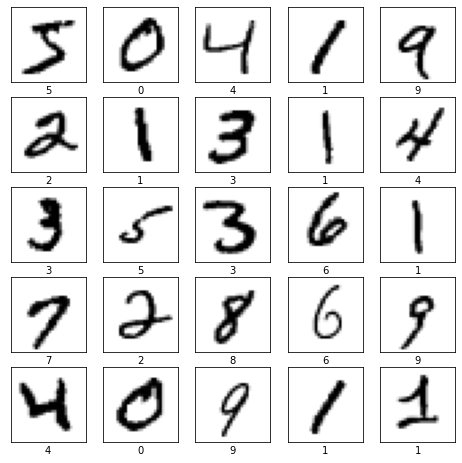

In [56]:
# Examining what the data looks like. 
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [57]:
# Examining the shape of the training and testing datasets. 
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [58]:
# Examining the length of the training and testing labels. 
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


## Three Layer Feed Forward Keras Example

Were going to build a three layer Keras model. This is a sequential or a feed-forward model. The first input layer flattens the 28 X 28 images into a processable form. The next layer is a dense 128 unit layer with relu activation. This is where the first processing of the data is occuring. And, the last is a dense 10 unit layer with a softmax activation working to further process that data. 

#### Defining the Model

In [59]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Compiling the Model

In [60]:
# Compiling the model with the "adam" optimizer and 
# utilizing the SparseCategoricalCrossentropy Loss function. 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy', 'SparseCategoricalCrossentropy'])

#### Fitting the Model

In [62]:
# Fitting the model with 10 epochs and a batch size of 32
model.fit(x_train,
          y_train, 
          epochs=10, 
          batch_size = 32,
          verbose=2)

Epoch 1/10
1875/1875 - 1s - loss: 0.1733 - accuracy: 0.9563 - sparse_categorical_crossentropy: 0.1733 - 1s/epoch - 790us/step
Epoch 2/10
1875/1875 - 2s - loss: 0.1760 - accuracy: 0.9572 - sparse_categorical_crossentropy: 0.1760 - 2s/epoch - 802us/step
Epoch 3/10
1875/1875 - 2s - loss: 0.1788 - accuracy: 0.9574 - sparse_categorical_crossentropy: 0.1788 - 2s/epoch - 823us/step
Epoch 4/10
1875/1875 - 2s - loss: 0.1609 - accuracy: 0.9595 - sparse_categorical_crossentropy: 0.1609 - 2s/epoch - 842us/step
Epoch 5/10
1875/1875 - 2s - loss: 0.1690 - accuracy: 0.9592 - sparse_categorical_crossentropy: 0.1690 - 2s/epoch - 972us/step
Epoch 6/10
1875/1875 - 2s - loss: 0.1664 - accuracy: 0.9596 - sparse_categorical_crossentropy: 0.1664 - 2s/epoch - 843us/step
Epoch 7/10
1875/1875 - 2s - loss: 0.1654 - accuracy: 0.9612 - sparse_categorical_crossentropy: 0.1654 - 2s/epoch - 867us/step
Epoch 8/10
1875/1875 - 2s - loss: 0.1537 - accuracy: 0.9625 - sparse_categorical_crossentropy: 0.1537 - 2s/epoch - 846

#### Evaluating the Model

In [63]:
results = model.evaluate(x_test,  y_test)

print(results)

313/313 [==============================] - 0s 779us/step - loss: 0.3121 - accuracy: 0.9487 - sparse_categorical_crossentropy: 0.3121
[0.3121379017829895, 0.9487000107765198, 0.3121379017829895]


#### Checking Predictions

In [65]:
y_pred = model(x_test)

pred_labels = np.argmax(y_pred, axis = 1)

pred_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [66]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

#### Examining Predictions

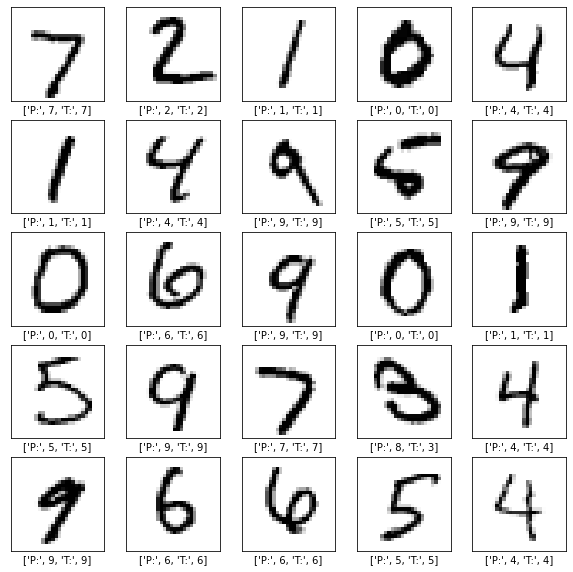

In [67]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(['P:', pred_labels[i], 'T:', y_test[i]])
plt.show()

## Introducing the Fashion-MNIST Data Set

Fashion MNIST has images of 10 fashion categories including Pullover, T-Shirt/Top, Dress, Sandal, Sneaker, Trouser, Shirt, Bag, Coat, Ankle Boot. 

This dataset is meant to work similarly to the Handwritten digits dataset but is a bit more complex. 

The total dataset consists of 70,000 images and is divided into a training set of 60,000 images and a test set of 10,000 images. All 70,000 images include labels which range from 0-9 for the 10 fashion categories. There is an equal number of each of the 10 labels represented int he dataset. Therefore, this dataset is balanced. 

You can find more information about Fashion-MNIST [here](https://keras.io/api/datasets/fashion_mnist/).

In [70]:
# Importing Packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [71]:
# Reading the data as test and training sets. 
fmnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

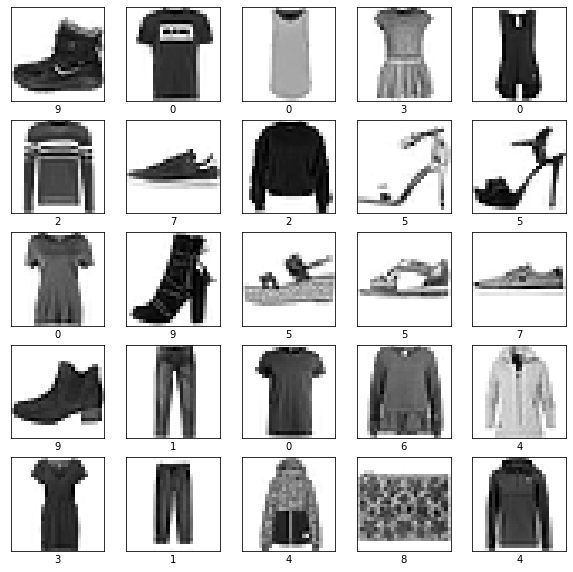

In [72]:
# Examining what the data looks like. 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [73]:
# Examining the shape of the training and testing datasets. 
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [74]:
# Examining the length of the training and testing labels. 
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


## Doing Some Pre-Processing

In [75]:
# Setting up class names for readability. 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [76]:
# Preprocessing to reduce image size. 
train_images = train_images / 255.0
test_images = test_images / 255.0

In [77]:
# Reshaping the input data.
train_images_rs = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_rs = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(train_images_rs.shape,test_images_rs.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [78]:
# One-Hot Encoding the labels. This helps the model understand the data. 
train_labels_1h = keras.utils.to_categorical(train_labels)
test_labels_1h = keras.utils.to_categorical(test_labels)

print(train_labels_1h[:,:10])
print(train_labels[:10])

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 0 0 3 0 2 7 2 5 5]


## Creating a 5-Layer CNN Sequential Model

This model includes a Conv2D convolutional layer with relu activation as its first layer. This is the convolutional aspect of the CNN. The second layer is a maxPooling2D layer to pool the images followed by a Flatten layer to flatten those images. It ten moves into a Dense layer with relu activation and a final Dense output layer with softmax activation. 

#### Defining the Model

In [79]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               540900    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

#### Compiling the Model

Here we are using the `keras.optimizers.SGD` optimizer with a learning rate of 0.01. This is just a gradient descent optimizer with a momentum element built in. We will also use `categorical_crossentropy` as our loss function. We are using `categorical_crossentropy` loss function because we have one-hot encoded our labels. 

In [80]:
model.compile(optimizer=keras.optimizers.SGD(0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Fitting the Model

In [81]:
# Fitting the model with 10 epochs and a batch size of 32
model.fit(train_images_rs, 
          train_labels_1h, 
          epochs=10, 
          batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6918 - accuracy: 0.7609
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4775 - accuracy: 0.8291
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4242 - accuracy: 0.8490
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3888 - accuracy: 0.8622
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3616 - accuracy: 0.8719
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3411 - accuracy: 0.8783
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3244 - accuracy: 0.8845
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3094 - accuracy: 0.8896
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2984 - accuracy: 0.8933
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

#### Evaluating the Model

In [82]:
results = model.evaluate(test_images_rs, test_labels_1h)

print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.8844
[0.3171273171901703, 0.8844000101089478]


#### Checking Predictions

In [85]:
predictions = model.predict(test_images_rs)

In [86]:
def get_prediction(i):
    plt.figure(figsize=(6,3))
    
    plt.subplot(1,2,1)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel("label: {}".format(class_names[test_labels[i]]))

    plt.subplot(1,2,2)
    plt.xticks(range(10))
    plt.yticks([])
    plt.bar(range(10), predictions[i], color="#777777")

    predicted_label = np.argmax(predictions[i])
    plt.xlabel("prediction: {}({:.4f})".format(class_names[predicted_label],np.max(predictions[i])))

    return plt.show()

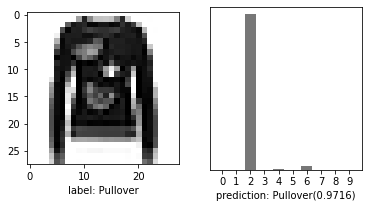

In [91]:
get_prediction(5000)

# Conclusions

In this case, we explored two very common datasets to learn the fundamental concepts behind deep learning image classification. This case has explored feed forward networks and convolutional neural networks and their use for simple image classification. In a real world setting, much more time would need to be spent on developing a raw dataset and on building a useful model. These are not trivial steps in machine learning and are often what makes the task much harder. The hope is that this case has given you the foundation to go and to explroe further. 